In [1]:
import numpy as np
from scipy import ndimage, stats, ndimage
import matplotlib.pyplot as plt
from nilearn import plotting, image, input_data, masking
from nilearn.image import load_img, index_img, new_img_like, resample_to_img, threshold_img
from nilearn.input_data import NiftiMasker
from scipy.stats import norm
import timeit
import seaborn as sns
import pandas as pd
from lmfit.models import SkewedGaussianModel
from nipype.interfaces.fsl.model import SmoothEstimate

200416-17:03:39,775 nipype.utils INFO:
	 No new version available.


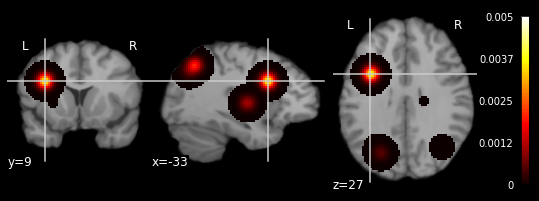

In [2]:
# get example foci image (BMID: 14110242-1)
BMID_EID = '5040011_3'
foci_image = image.load_img(BMID_EID + '_foci_tal.nii')
sm_foci_image = image.smooth_img(foci_image, fwhm=12) #fhwm is in mm, 12
sm_foci_image = image.index_img(sm_foci_image,0) #get rid of temporal dimension
sm_foci_image.to_filename(BMID_EID + '_foci_tal_smoothed.nii.gz')
bg_image = image.load_img('../colin_27.nii.gz')

masker = NiftiMasker(mask_img="../colin_27_mask_2mm_dil.nii.gz")
sm_foci_image_mask = masker.fit_transform(sm_foci_image)
sm_foci_image_mask = masker.inverse_transform(sm_foci_image_mask)
sm_foci_image_mask.to_filename(BMID_EID + '_foci_tal_smoothed_masked.nii.gz')

plotting.plot_stat_map(sm_foci_image_mask, bg_image)

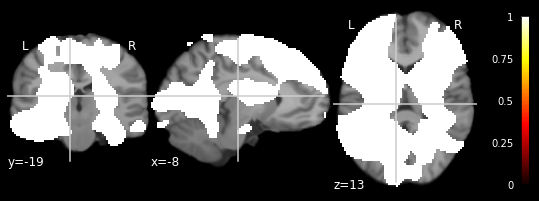

In [3]:
# get component image and positive mask
ic_func_3 = image.load_img('../FUNCTIONAL_ICA_BRAINMAP_03.nii.gz')

ic_func_3_pos_mask = image.math_img('img > 0',img=ic_func_3)

plotting.plot_stat_map(ic_func_3_pos_mask, bg_image)

/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/nilearn/plotting/find_cuts.py:63: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  .format(DEFAULT_CUT_COORDS))
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


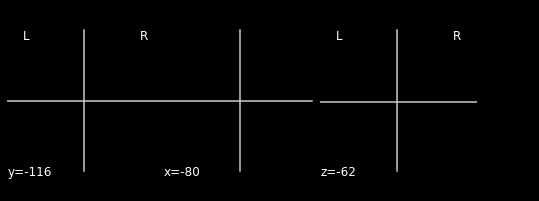

In [10]:
masker = input_data.NiftiMasker(mask_img=ic_func_3_pos_mask)

# get array data (within mask) of smoothed foci data and component image
foci_data = masker.fit_transform(sm_foci_image)
ic_data = masker.fit_transform(ic_func_3)

# cast foci data to int
foci_data = foci_data.astype(int)

# plot masked foci data over masked component data
foci_data_from_mask = masker.inverse_transform(foci_data)
ic_data_from_mask = masker.inverse_transform(ic_data)
#plotting.plot_stat_map(ic_data_from_mask, bg_image)
plotting.plot_stat_map(foci_data_from_mask,ic_data_from_mask)

In [11]:
np.corrcoef(foci_data,ic_data)[0,1]

/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


nan

from func549-norm-filtered-cc-gt0 w/ IC-3: <br />
14110242_1 = 0.0438 - this script result: 0.0151 <br />
16030053_5 = 0.4083 - this script result: 0.3999 <br />
7010010_1 = 0.3855 - this script result: 0.3937 <br />
5040007_1 = 0.0798 - this script result: 0.0865 <br />

In [9]:
int(np.squeeze(foci_data))

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
foci_data